<a href="https://colab.research.google.com/github/MNazamy/data_analytics/blob/main/Python/Group4_Datathon_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Authors: Karma Gurung and Matin Nazamy**

The objective of our project is to wrangle and analyze data over the last year for Covid cases in NYS, Unemployment rates in NYS, and Stock/Commodity preformance and draw conclusions for each and how they might intertwine with eachother

**Sources**


*   NY Times Github for Covid Data
*   LAGCC Github and NYSDOL for NYS Unemployment Data
*   Yahoo Finance for Stock Data







# Part 1: Environment Set Up

In [ ]:
#Data Manipulation
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15,15)})
%matplotlib inline
style.use('ggplot')

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

# Part 2 -- Data Collection

## **Covid Data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

## **Unemployment Data**

In [ ]:
state_unemp_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/hackathon/data/state_unemployment_data_1.csv')

## **Stock Data**

In [ ]:
# The list stocks we'll use for this analysis
stock_list = ['SPY','QQQ','GLD']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(2020,1,1)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in stock_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

#For BTC dataframe 
btc = DataReader('BTC-USD', 'yahoo', start, end)

#Part 3 -- Data Wrangling

## **Covid Data**

In [ ]:
df.drop(['fips'],axis=1,inplace=True)
df['date']=pd.to_datetime(df['date'])


In [ ]:
ny_df = df[df['state']=='New York']
#new cases for NY
# type(ny_df['cases'])

newcase = []
newdeath = []
previuos_case = 0
previous_death= 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  current_death = row['deaths']
  newdeath_count = current_death - previous_death
  previous_death = current_death
  newdeath.append(newdeath_count)
  # print(newcase_count)
ny_df['new_cases'] = newcase
ny_df['new_deaths'] = newdeath
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']
ny_new_deaths = ny_df['new_deaths']

##**Unemployment Data**

In [ ]:
ny_unemp_df = state_unemp_df[state_unemp_df['State']=='New York']
ny_unemp_df .iloc[0,10] = 9.6 #filling NYS null values with data found on google
ny_unemp_df .iloc[0,11] = 8.4
ny_unemp_df .iloc[0,12] = 8.2
ny_unemp_df 

##**Stock Data**

In [ ]:
#Putting all tickers in terms of their multiple of closing price since 01/02/2020

btc['Multiple'] = btc['Adj Close'] / 7200 
GLD['Multiple'] = GLD['Adj Close'] / 143.95
SPY['Multiple'] = SPY['Adj Close'] / 324.87
QQQ['Multiple'] = QQQ['Adj Close'] / 216.16
btc.head()

,High,Low,Open,Close,Volume,Adj Close,Multiple
Date,,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,1.856566e+10,7200.174316,1.000024
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,2.080208e+10,6985.470215,0.970204
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,2.811148e+10,7344.884277,1.020123
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,1.844427e+10,7410.656738,1.029258
2020-01-05,7544.497070,7400.535645,7410.451660,7411.317383,1.972507e+10,7411.317383,1.029350


# Part 4 -- Exploratory Data Analysis

## **Covid Data**

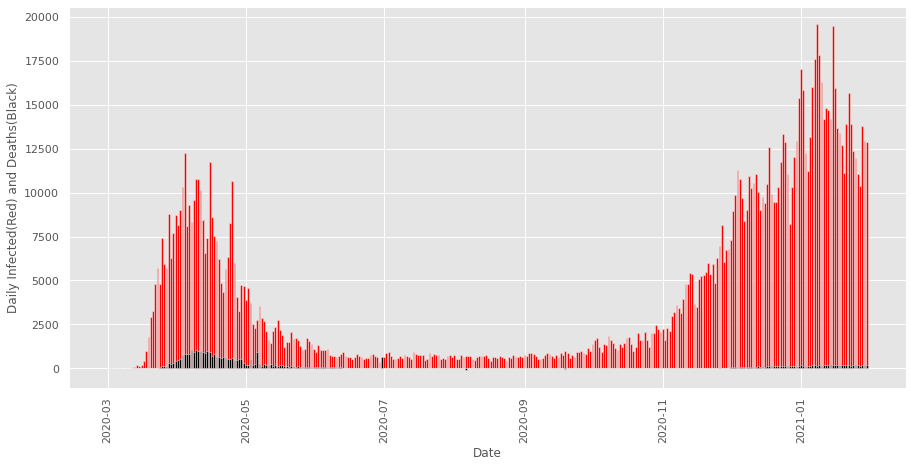

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates,height=ny_new_cases, color='red')
plt.bar(x=ny_dates,height=ny_new_deaths,color='black')
plt.xticks(rotation=90)
plt.ylabel('Daily Infected(Red) and Deaths(Black)')
plt.xlabel('Date')

plt.show()

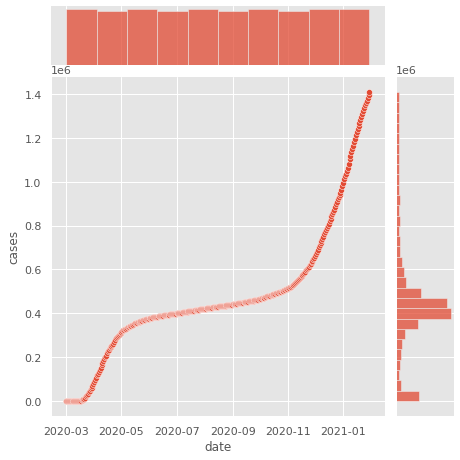

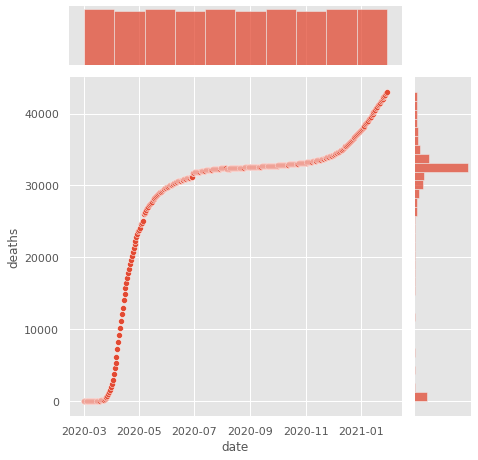

In [ ]:
sns.jointplot(x='date', y='cases', data=ny_df,kind='scatter',height=6.5)
sns.jointplot(x='date', y='deaths', data=ny_df,kind='scatter',height=6.5)

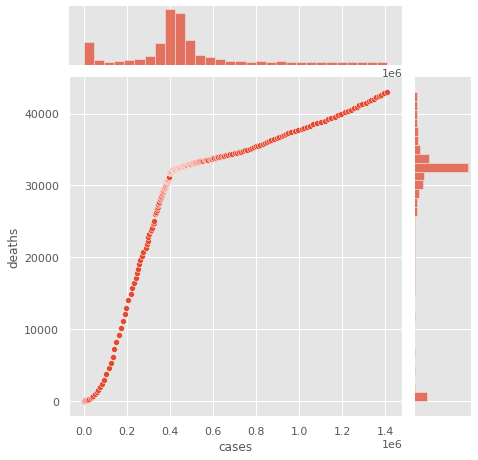

In [ ]:
sns.jointplot(x='cases', y='deaths', data=ny_df,kind='scatter',height=6.5)

## **Unemployment Data**

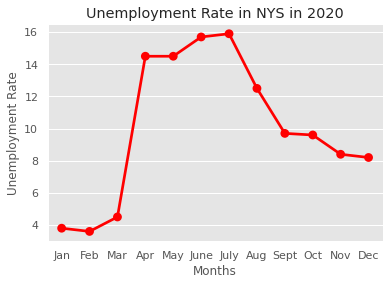

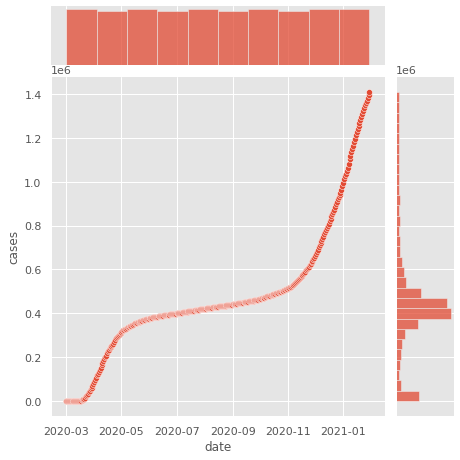

In [ ]:
months = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
values = [3.8 ,3.6,4.5,14.5,14.5, 	15.7, 	15.9, 	12.5, 	9.7, 	9.6, 	8.4, 	8.2]
fig=sns.pointplot(x=months,y=values,xlabel='Month',ylabel='Unemployment Rate ( % )',color ='red')
fig.set(xlabel='Months', ylabel='Unemployment Rate', title='Unemployment Rate in NYS in 2020')

sns.jointplot(x='date', y='cases', data=ny_df,kind='scatter',height=6.5)


The unemployment rate skyrocketed as NYS was rocked by Covid in the first quarter of 2020. In the last half of the year, the unemployment rate dropped, despite a rise in cases. This is and general public knowledge on social distancing and health precautions.

Also, the nature of work in NY metropolitan areas are mostly open with limited capacity, or working from home if possible. 

## **Stock Data**

### Performance of assets since 01/01/2020

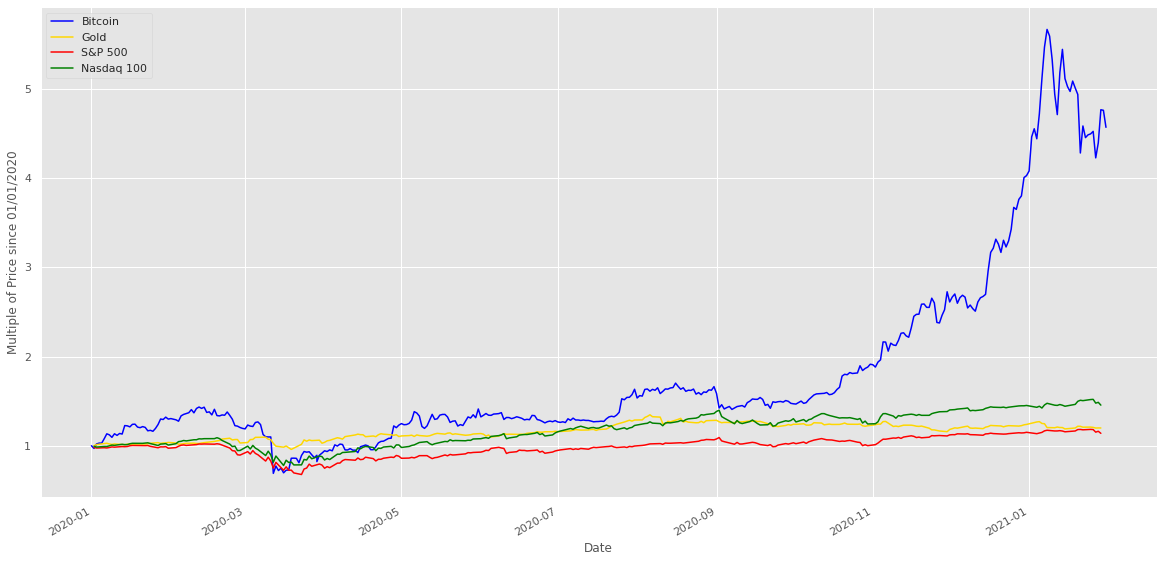

<Figure size 432x288 with 0 Axes>

In [ ]:
# Let's see a historical view of the closing price
btc['Multiple'].plot(legend=True,figsize=(20,10),label='Bitcoin',color='blue')
GLD['Multiple'].plot(legend=True,figsize=(20,10),label = 'Gold',color='gold')
SPY['Multiple'].plot(legend=True,figsize=(20,10),label = 'S&P 500',color='red')
QQQ['Multiple'].plot(legend=True,figsize=(20,10),label = 'Nasdaq 100',color='green')
plt.ylabel('Multiple of Price since 01/01/2020')
fig = plt.figure()
fig.patch.set_facecolor('blue')
fig.patch.set_alpha(0.6)
plt.show()


### Looking at VOLUME

Text(0, 0.5, 'Daily Trading Volume (US Dollars)')

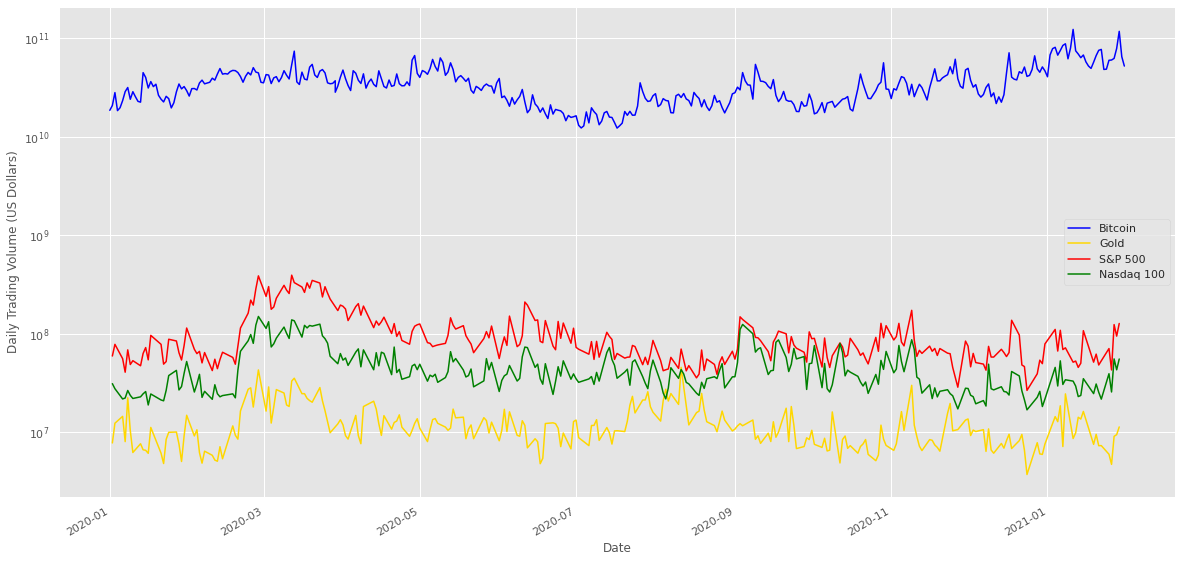

In [ ]:
btc['Volume'].plot(legend=True,figsize=(20,10),label='Bitcoin',color='blue')
GLD['Volume'].plot(legend=True,figsize=(20,10),label = 'Gold',color='gold')
SPY['Volume'].plot(legend=True,figsize=(20,10),label = 'S&P 500',color='red')
QQQ['Volume'].plot(legend=True,figsize=(20,10),label = 'Nasdaq 100',color='green')
plt.yscale("log")
plt.ylabel('Daily Trading Volume (US Dollars)')

### Looking at Daily Return of BTC vs QQQ

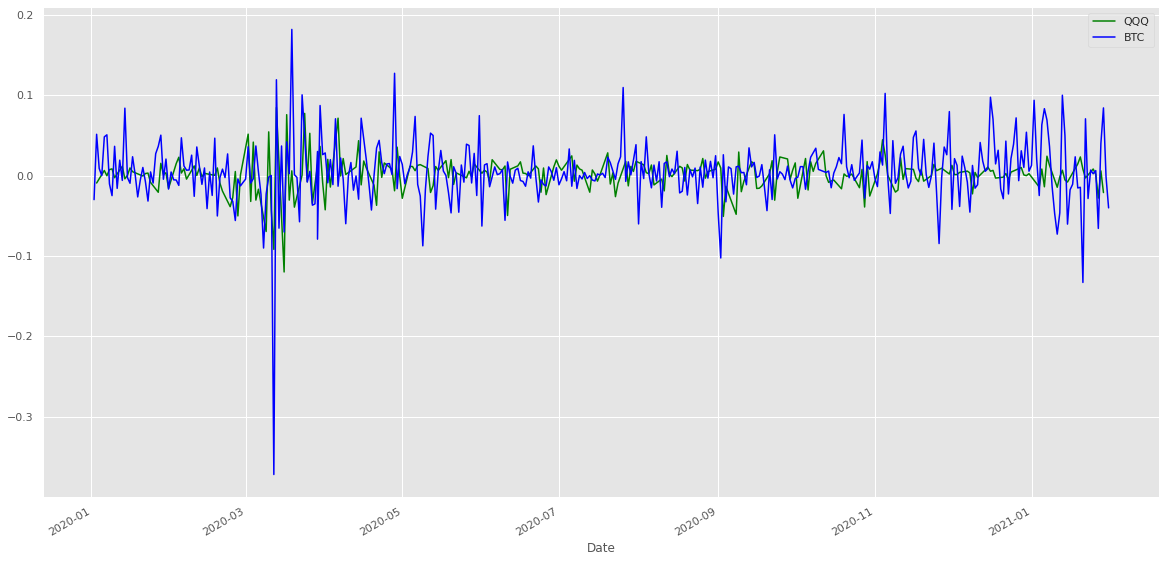

In [ ]:
# We'll use pct_change to find the percent change for each day
btc['Daily Return'] = btc['Adj Close'].pct_change()
QQQ['Daily Return'] = QQQ['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
QQQ['Daily Return'].plot(figsize=(20,10),legend=True,linestyle='-',color='green',label='QQQ')
btc['Daily Return'].plot(figsize=(20,10),legend=True,linestyle='-',color='blue',label='BTC')

# Part 5 -- Conclusion

### Conclusion #1: 

The end of 2020 and beginning of 2021 has seen more cases than in the onset of the pandemic. The highest number of cases was in January 2021, yet the highest number of deaths was in April of 2020. The increase in cases is probably due to mass production of Covid tests. The reason the deaths was so much higher in April was due to the lack of preperation in medical equipment, in medical personnel, and lack of knowledge in the general public. 

### Conclusion #2:

 Although cases were rising rapidly towards the end of 2020, the unemployment rate in New York continues to go down. This is due to policies such as reduced capacity and outdoor dining. It's also due to a work-from-home economy, as companies started to hire online. Some tech companies have realized its more practical to work from home rather than show up to the office.

### Conclusion #3:

 As retail and institutional investors look for new opportunties to invest, the Nasdaq 100 and Bitcoin have outpreformed the recovery of the S&P500 Index. This is due to the advantages of technology and the internet in a work-from-home environment. Retail investors probably invested a lot of their stimulus checks and P.U.A benefits as well aiding to the recovery of the market. 